In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

### One dimensional problem
Source of date about EMF: https://www.emf-portal.org/en/emf-source/322

In [43]:
N = 50
E_0 = 20 #V/m
dx = 0.01 # co 1 cm
k = 6.28/0.12 #2pi/długość fali
matrix = np.zeros((N,N),dtype=np.csingle)
n = np.ones(N,dtype=np.csingle)
f = np.zeros(N,dtype=np.csingle)

In [44]:
def generateMatrix(N,dx,n,k):
    temp_x = []
    temp_y = []
    temp_var = []

    for i in range(N):
        temp_x.append(i)
        temp_y.append(i)
        temp_var.append(-2/(dx**2) + k**2*n[i]**2)

    for i in range(1,N):
        temp_x.append(i-1)
        temp_y.append(i)
        temp_var.append(1/dx**2)
    
    for i in range(N-1):
        temp_x.append(i+1)
        temp_y.append(i)
        temp_var.append(1/dx**2)

    return temp_var, temp_x, temp_y


def addWall(n,wall,GHz,material):
    a,b,c,d = material
    for i in range(len(wall)):
        n[wall[i]] = np.sqrt(a*GHz**b - 1j*17.98*c*GHz**d/GHz)
    return n

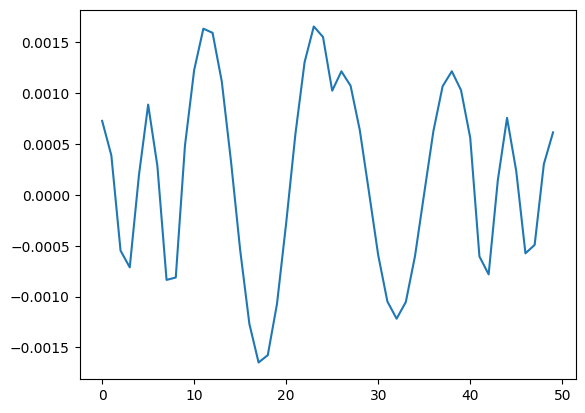

In [45]:
concrete =  (5.24,  0,  0.0462, 0.7822)
brick =     (3.91,  0,  0.0238, 0.16)
wood =      (1.99,  0,  0.0047, 1.0718)
glass =     (6.31,  0,  0.0036, 1.3394)
metal =     (1,     0,  1e7,    0)

f[N//2] = 10
n = addWall(n,range(10),2.4,concrete)
n = addWall(n,range(-10,0),2.4,concrete)
var, coordinates_x, coordinates_y = generateMatrix(N,dx,n,k)
matrix_sparse = csc_matrix((var,(coordinates_x, coordinates_y)))
E_1D = spsolve(matrix_sparse,f)
plt.plot(np.real(E_1D))

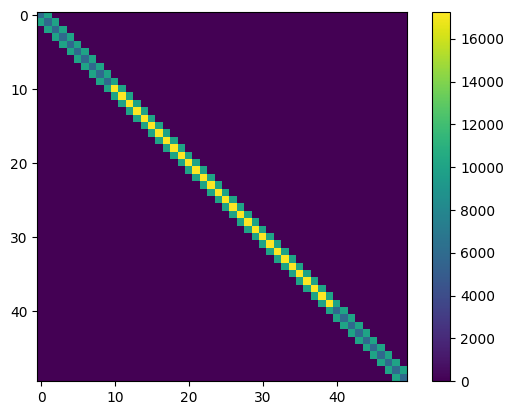

In [46]:
plt.imshow(np.abs(matrix_sparse.toarray()))
plt.colorbar()


In [6]:
# for i in range(1,N-1):
#         matrix[i,i] = -2/(dx**2) + k**2/n[i]**2
#         matrix[i,i-1] = 1/dx**2
#         matrix[i,i+1] = 1/dx**2
# matrix[0,0] = -2/dx**2 + k**2/n[0]**2
# matrix[0,1] = 1/dx**2
# matrix[-1,-1] = -2/dx**2 + k**2/n[-1]
# matrix[-1,-2] = 1/dx**2
# f[N//4] = 20


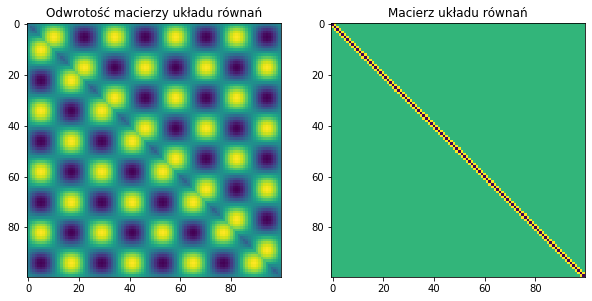

In [7]:
invMatrix = np.linalg.inv(matrix)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(invMatrix)
plt.title('Odwrotość macierzy układu równań')
plt.subplot(1,2,2)
plt.title('Macierz układu równań')
plt.imshow(matrix)

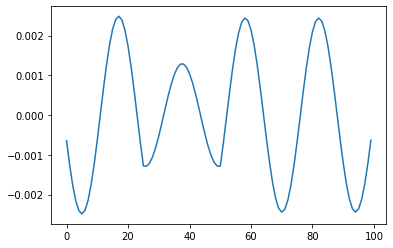

In [8]:
plt.plot(range(len(f)),np.matmul(invMatrix, f))